<a href="https://colab.research.google.com/github/AKHIL-882/Widhya-Machine-Learning-Internship/blob/main/1.%20Covid_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
upload = files.upload()

Saving covid19.csv to covid19 (1).csv


### **1. Reading the dataset**

In [3]:
import io
dataset = pd.read_csv('covid19.csv')

**1.1 Printing the first 10 rows of the dataset**

In [4]:
dataset.head(10)

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
5,6,04/02/20,Kerala,3,0,0,0
6,7,05/02/20,Kerala,3,0,0,0
7,8,06/02/20,Kerala,3,0,0,0
8,9,07/02/20,Kerala,3,0,0,0
9,10,08/02/20,Kerala,3,0,0,0


**1.2 Printing the last 10 rows of the dataset**

In [5]:
dataset.tail(10)

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
260,261,21/03/20,Punjab,13,0,0,1
261,262,21/03/20,Rajasthan,15,2,3,0
262,263,21/03/20,Tamil Nadu,3,0,1,0
263,264,21/03/20,Telengana,10,11,1,0
264,265,21/03/20,Chandigarh,1,0,0,0
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0
269,270,21/03/20,West Bengal,3,0,0,0


**1.3. Knowing the description of the dataset**

In [6]:
dataset.describe()

,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,135.500000,5.551852,1.329630,0.603704,0.092593
std,78.086491,8.339625,3.587288,1.461522,0.290399
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,68.250000,1.000000,0.000000,0.000000,0.000000
50%,135.500000,3.000000,0.000000,0.000000,0.000000
75%,202.750000,6.000000,0.000000,0.000000,0.000000
max,270.000000,60.000000,14.000000,9.000000,1.000000


**1.4 Knowing the information of the dataset**

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       270 non-null    int64 
 1   Date                      270 non-null    object
 2   State/UnionTerritory      270 non-null    object
 3   ConfirmedIndianNational   270 non-null    int64 
 4   ConfirmedForeignNational  270 non-null    int64 
 5   Cured                     270 non-null    int64 
 6   Deaths                    270 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 14.9+ KB


**1.5 Checking whether the dataset contains null values or not**

In [8]:
dataset.isnull().sum()

Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

### **2 Findind the count of cases**

**2.1 Finding the cases of India based on date**

In [35]:
dateset_groupby_indians = dataset.groupby('Date')['ConfirmedIndianNational'].sum()
dateset_groupby_indians

Date
01/02/20      2
01/03/20      3
02/02/20      3
02/03/20      5
03/02/20      3
03/03/20      5
04/02/20      3
04/03/20     12
05/02/20      3
05/03/20     14
06/02/20      3
06/03/20     15
07/02/20      3
07/03/20     18
08/02/20      3
08/03/20     23
09/02/20      3
09/03/20     30
10/02/20      3
10/03/20     42
11/02/20      3
11/03/20     44
12/02/20      3
12/03/20     57
13/02/20      3
13/03/20     64
14/02/20      3
14/03/20     67
15/02/20      3
15/03/20     93
16/02/20      3
16/03/20     97
17/02/20      3
17/03/20    113
18/02/20      3
18/03/20    126
19/02/20      3
19/03/20    148
20/02/20      3
20/03/20    191
21/02/20      3
21/03/20    244
22/02/20      3
23/02/20      3
24/02/20      3
25/02/20      3
26/02/20      3
27/02/20      3
28/02/20      3
29/02/20      3
30/01/20      1
31/01/20      1
Name: ConfirmedIndianNational, dtype: int64

**2.1 Finding the cases of Foreign based on date**

In [14]:
dataset_groupby_foreign = dataset.groupby('Date')['ConfirmedForeignNational'].sum()
dataset_groupby_foreign

Date
01/02/20     0
01/03/20     0
02/02/20     0
02/03/20     0
03/02/20     0
03/03/20     1
04/02/20     0
04/03/20    16
05/02/20     0
05/03/20    16
06/02/20     0
06/03/20    16
07/02/20     0
07/03/20    16
08/02/20     0
08/03/20    16
09/02/20     0
09/03/20    16
10/02/20     0
10/03/20    16
11/02/20     0
11/03/20    16
12/02/20     0
12/03/20    17
13/02/20     0
13/03/20    17
14/02/20     0
14/03/20    17
15/02/20     0
15/03/20    17
16/02/20     0
16/03/20    17
17/02/20     0
17/03/20    24
18/02/20     0
18/03/20    25
19/02/20     0
19/03/20    25
20/02/20     0
20/03/20    32
21/02/20     0
21/03/20    39
22/02/20     0
23/02/20     0
24/02/20     0
25/02/20     0
26/02/20     0
27/02/20     0
28/02/20     0
29/02/20     0
30/01/20     0
31/01/20     0
Name: ConfirmedForeignNational, dtype: int64

**2.3 Finding the number of cases cured based on date**

In [15]:
dataset_groupby_cured = dataset.groupby('Date')['Cured'].sum()
dataset_groupby_cured

Date
01/02/20     0
01/03/20     0
02/02/20     0
02/03/20     0
03/02/20     0
03/03/20     3
04/02/20     0
04/03/20     3
05/02/20     0
05/03/20     3
06/02/20     0
06/03/20     3
07/02/20     0
07/03/20     3
08/02/20     0
08/03/20     3
09/02/20     0
09/03/20     3
10/02/20     0
10/03/20     3
11/02/20     0
11/03/20     3
12/02/20     0
12/03/20     3
13/02/20     0
13/03/20     3
14/02/20     0
14/03/20    10
15/02/20     0
15/03/20    13
16/02/20     0
16/03/20    13
17/02/20     0
17/03/20    14
18/02/20     0
18/03/20    14
19/02/20     0
19/03/20    20
20/02/20     0
20/03/20    23
21/02/20     0
21/03/20    23
22/02/20     0
23/02/20     0
24/02/20     0
25/02/20     0
26/02/20     0
27/02/20     0
28/02/20     0
29/02/20     0
30/01/20     0
31/01/20     0
Name: Cured, dtype: int64

**2.4 Finding the number of deaths based on date**

In [16]:
dataset_groupby_deaths = dataset.groupby('Date')['Deaths'].sum()
dataset_groupby_deaths

Date
01/02/20    0
01/03/20    0
02/02/20    0
02/03/20    0
03/02/20    0
03/03/20    0
04/02/20    0
04/03/20    0
05/02/20    0
05/03/20    0
06/02/20    0
06/03/20    0
07/02/20    0
07/03/20    0
08/02/20    0
08/03/20    0
09/02/20    0
09/03/20    0
10/02/20    0
10/03/20    0
11/02/20    0
11/03/20    0
12/02/20    0
12/03/20    0
13/02/20    0
13/03/20    1
14/02/20    0
14/03/20    2
15/02/20    0
15/03/20    2
16/02/20    0
16/03/20    2
17/02/20    0
17/03/20    3
18/02/20    0
18/03/20    3
19/02/20    0
19/03/20    4
20/02/20    0
20/03/20    4
21/02/20    0
21/03/20    4
22/02/20    0
23/02/20    0
24/02/20    0
25/02/20    0
26/02/20    0
27/02/20    0
28/02/20    0
29/02/20    0
30/01/20    0
31/01/20    0
Name: Deaths, dtype: int64

**2.5 Finding the cases by states**

In [19]:
dataset_groupby_deaths = dataset.groupby('State/UnionTerritory')['ConfirmedIndianNational'].sum()
dataset_groupby_deaths

State/UnionTerritory
Andhra Pradesh                           15
Chandigarh                                1
Chattisgarh                               1
Chhattisgarh                              2
Delhi                                   129
Gujarat                                  12
Haryana                                  13
Himachal Pradesh                          2
Jammu and Kashmir                         4
Karnataka                               103
Kerala                                  391
Ladakh                                   13
Madhya Pradesh                            4
Maharashtra                             340
Odisha                                    8
Pondicherry                               2
Puducherry                                2
Punjab                                   27
Rajasthan                                54
Tamil Nadu                               20
Telengana                                48
Union Territory of Chandigarh             2
Union Terri

### **3. Sum of All columns**

In [36]:
dataset_groupby_cured.sum()

163

In [50]:
dataset_groupby_deaths.sum(axis=None)

1499

In [38]:
dataset_groupby_foreign.sum()

359

In [46]:
dateset_groupby_indians.sum()

1499

**3.1 From Columns**

In [40]:
dataset.Deaths.sum()

25

In [41]:
dataset.Cured.sum()

163

In [42]:
dataset.ConfirmedForeignNational.sum()

359

In [44]:
dataset.ConfirmedIndianNational.sum()

1499

### **4 Visualizations**

**4.1 Visualizing using Scatter plots on total cases of Indians**

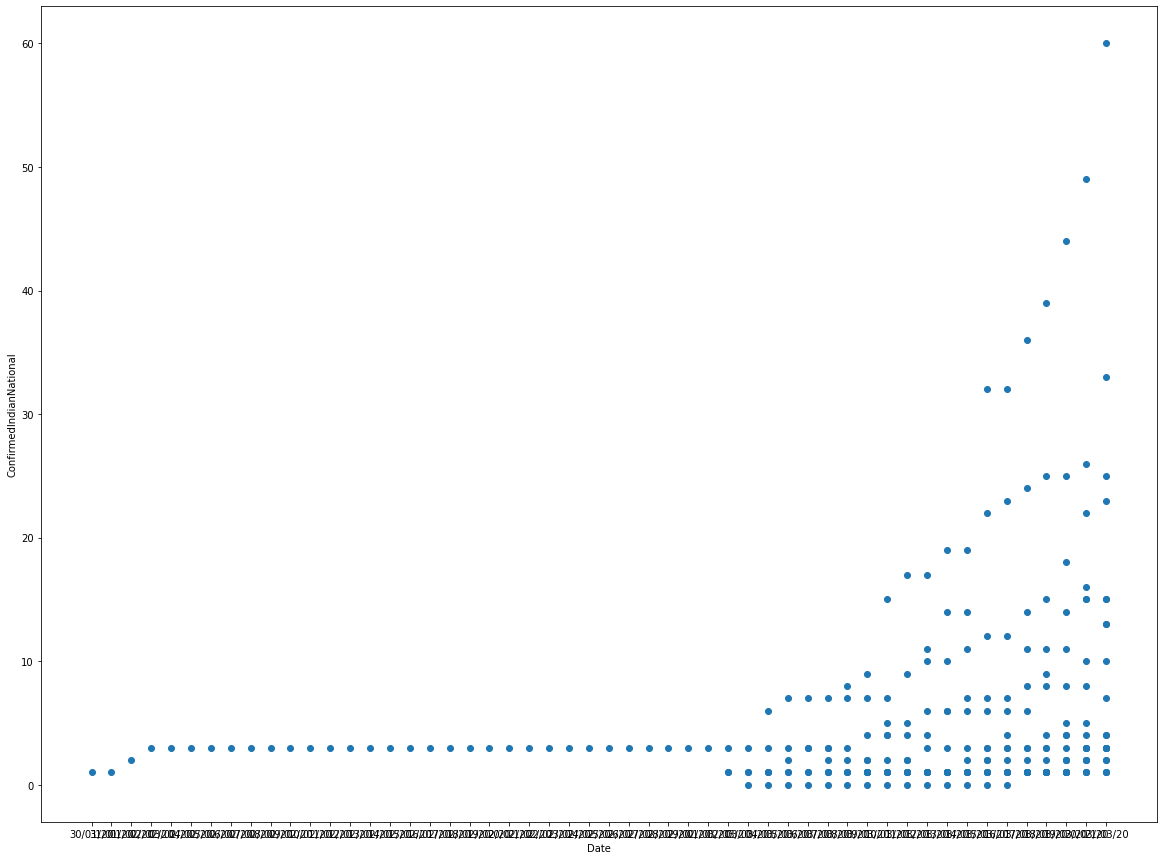

In [61]:
fig, ax = plt.subplots(figsize = (20,15))
ax.scatter(dataset['Date'],dataset['ConfirmedIndianNational'])
ax.set_xlabel('Date')
ax.set_ylabel('ConfirmedIndianNational')
plt.show()

**4.2 Visualizing using Scatter Plot on total cases of Foreign**

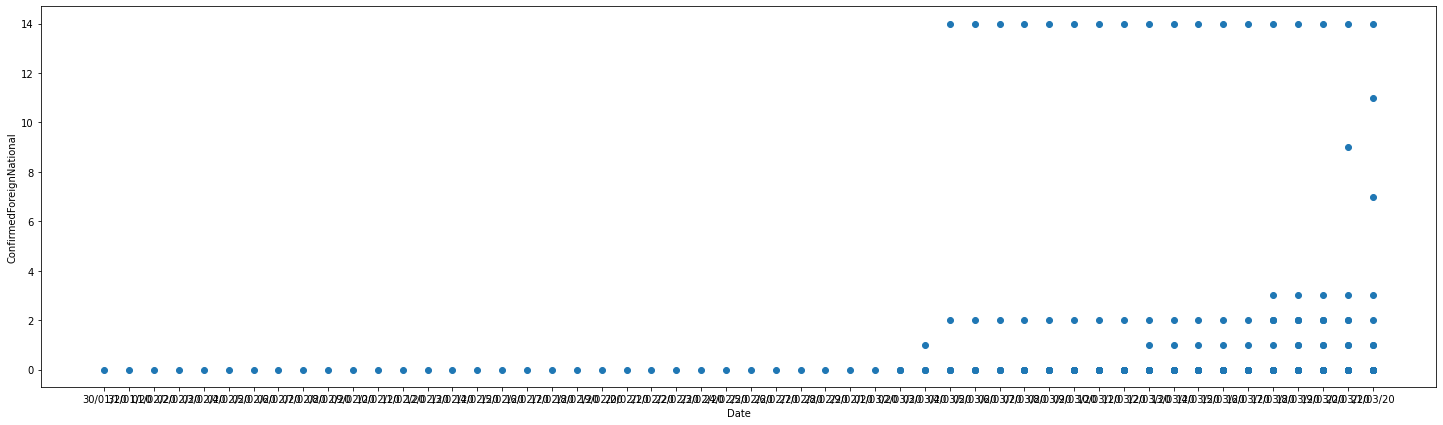

In [66]:
fig, ax = plt.subplots(figsize = (25,7))
ax.scatter(dataset['Date'],dataset['ConfirmedForeignNational'])
ax.set_xlabel('Date')
ax.set_ylabel('ConfirmedForeignNational')
plt.show()